# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera

# Creating and cleaning first dataframe

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

Dropping Outliers of price to within 3 standard deviations
- Only losing two percent of data

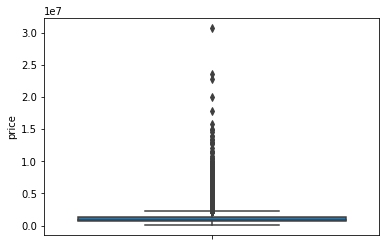

In [8]:
sns.boxplot(y =df['price']);

In [9]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

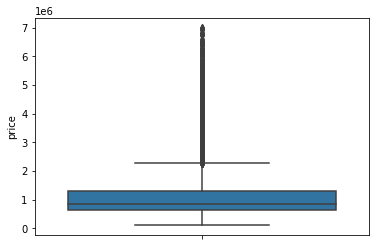

In [10]:
sns.boxplot(y =df_no_outliers['price']);

In [11]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


- Drop ID: just a unique identifier, no helpful info
- Drop lat/long and address: Location not important in this analysis
- Drop year renovated: if you are making new renovations it would supercede this
- Drop date: last sale date is not relevant to remodeling home

# Creating a new DF that now has features dropped
### These columns are not relevant for a variety of reasons listed above

In [12]:
# Dropping columns that seem to have little effect
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_renovated', 'date'], axis = 1)

In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   sqft_lot       29927 non-null  int64  
 5   floors         29927 non-null  float64
 6   waterfront     29927 non-null  object 
 7   greenbelt      29927 non-null  object 
 8   nuisance       29927 non-null  object 
 9   view           29927 non-null  object 
 10  condition      29927 non-null  object 
 11  grade          29927 non-null  object 
 12  heat_source    29927 non-null  object 
 13  sewer_system   29927 non-null  object 
 14  sqft_above     29927 non-null  int64  
 15  sqft_basement  29927 non-null  int64  
 16  sqft_garage    29927 non-null  int64  
 17  sqft_patio     29927 non-null  int64  
 18  yr_bui

- categorical numeric:
    - Bedrooms
    - bathrooms
    - floors

## Creating a DF with just continuous numerical data
### Dropping numerical categorical variables

In [14]:
# Creating new df with only numerical columns and 
# dropping numerical categorical columns
df_numeric = df_dropped.drop(['bedrooms', 'bathrooms', 'floors'], axis = 1).select_dtypes('number')

In [15]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   sqft_living    29927 non-null  int64  
 2   sqft_lot       29927 non-null  int64  
 3   sqft_above     29927 non-null  int64  
 4   sqft_basement  29927 non-null  int64  
 5   sqft_garage    29927 non-null  int64  
 6   sqft_patio     29927 non-null  int64  
 7   yr_built       29927 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.1 MB


In [16]:
df_numeric.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,1180,7140,1180,0,0,40,1969
1,920000.0,2770,6703,1570,1570,0,240,1950
2,311000.0,2880,6156,1580,1580,0,0,1956
3,775000.0,2160,1400,1090,1070,200,270,2010
4,592500.0,1120,758,1120,550,550,30,2012


## Standardizing data

In [17]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()

# for col in df_standardized:
#     df_standardized[col] = (df_standardized[col] - df_standardized[col].mean()) / df_standardized[col].std()
    
# df_standardized.describe()

## Creating a DF with just categorical data

In [18]:
# Creating basic cat df based on dtype
df_cat = df_dropped.select_dtypes(object)

In [19]:
# viewing cat df
df_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC


In [20]:
# adding numeric categories into cat df
num_cat = ['bedrooms', 'bathrooms', 'floors']
df_all_cat = df_cat.copy()

for cat in num_cat:
    df_all_cat[cat] = df[cat].copy()

In [21]:
df_all_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0


## Beginning initial analysis

### Starting with numeric only

In [22]:
# df_standardized['price'] = df_numeric['price']

In [23]:
# checking correlation on continuous numerical features
df_numeric.corr()['price'].sort_values(ascending=True)

sqft_lot         0.096905
yr_built         0.106209
sqft_basement    0.238018
sqft_garage      0.296795
sqft_patio       0.309581
sqft_above       0.583745
sqft_living      0.655892
price            1.000000
Name: price, dtype: float64

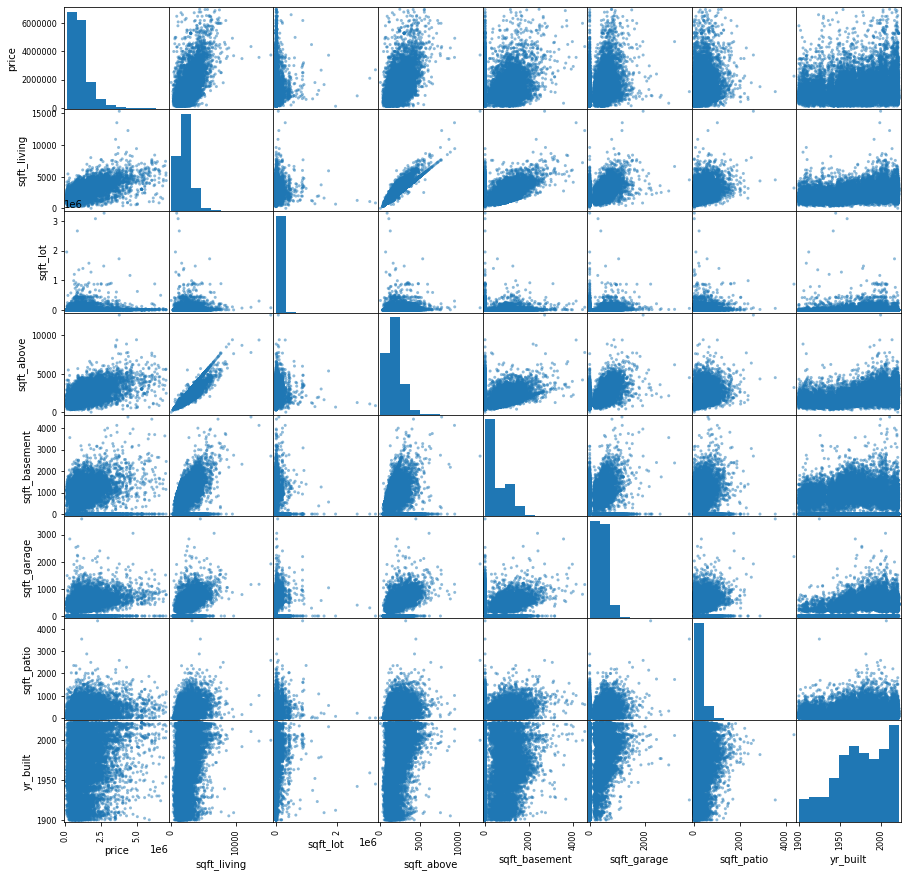

In [24]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_numeric,figsize  = [15, 15]);

In [25]:
# creating baseline model based on highest .corr() to price and confirmed by scatter plot
X = df_numeric[['sqft_living']]
y = df_numeric['price']

model = sm.OLS(y, sm.add_constant(X)).fit()

In [26]:
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.259e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:04:31   Log-Likelihood:            -4.3768e+05
No. Observations:               29927   AIC:                         8.754e+05
Df Residuals:                   29925   BIC:                         8.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.872e+04   7636.645      5.071      0.000    2.38e+04    5.37e+04
sqft_living   496.9333      3.306    150.309      0.000     490.453     503.413
==============================================================================
Omnibus:                    15009.122   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199931.135
Skew:                           2.091   Prob(JB):                         0.00
Kurtosis:                      14.952   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results of initial baseline model:
- Our model explains 43% of the variance in price
- The model is overall statistically significant
- The coef's for constant and sqft living are both stat sig

- for a house with zero sq ft of living area, we would expect a home value of \\$3,900
- for every increase in sq ft of living area, we would expect an increase in value of about \\$500


WRONG: This was for standardized but I un-standardized
- for a house with average sq ft of living area, we would expect a home value of $1,061,000
- for every increase in 1sq ft, we would expect an increase of 406,600

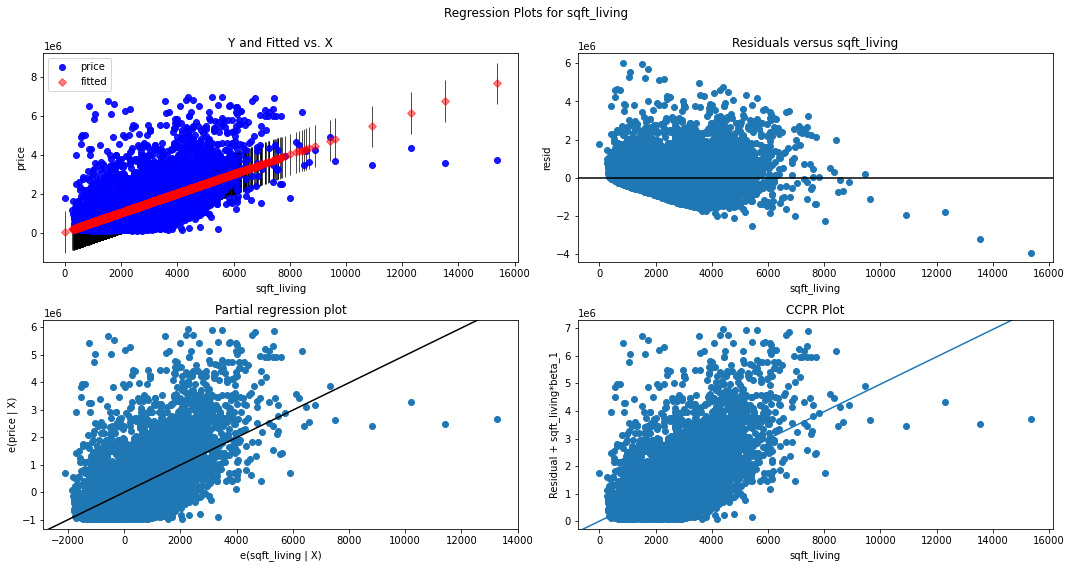

In [27]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

# Below is a test, do not pay attentions

Price looks to be incredibly right skewed, lets blow that one up for a closer look

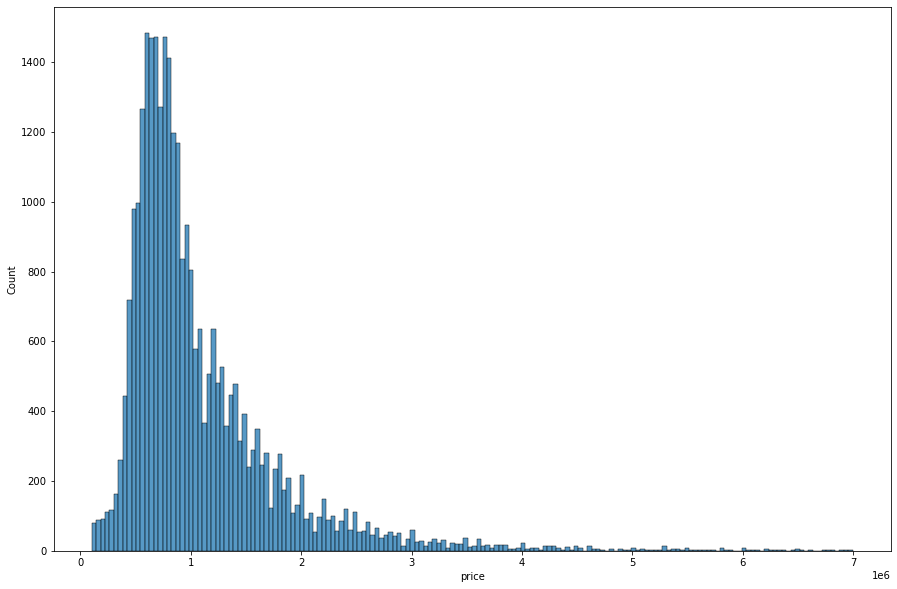

In [28]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df_numeric['price'], bins = int(np.sqrt(len(df_numeric['price']))));

If we log the saleprice, does that make it look any more normal?

In [29]:
y_log = np.log(y)
X = df_numeric[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()

In [30]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:04:40   Log-Likelihood:                -16792.
No. Observations:               29927   AIC:                         3.359e+04
Df Residuals:                   29925   BIC:                         3.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9649      0.006   2176.234      0.000      12.953      12.977
sqft_living     0.0004   2.58e-06    142.111      0.000       0.000       0.000
==============================================================================
Omnibus:                     2324.497   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8890.917
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       5.590   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

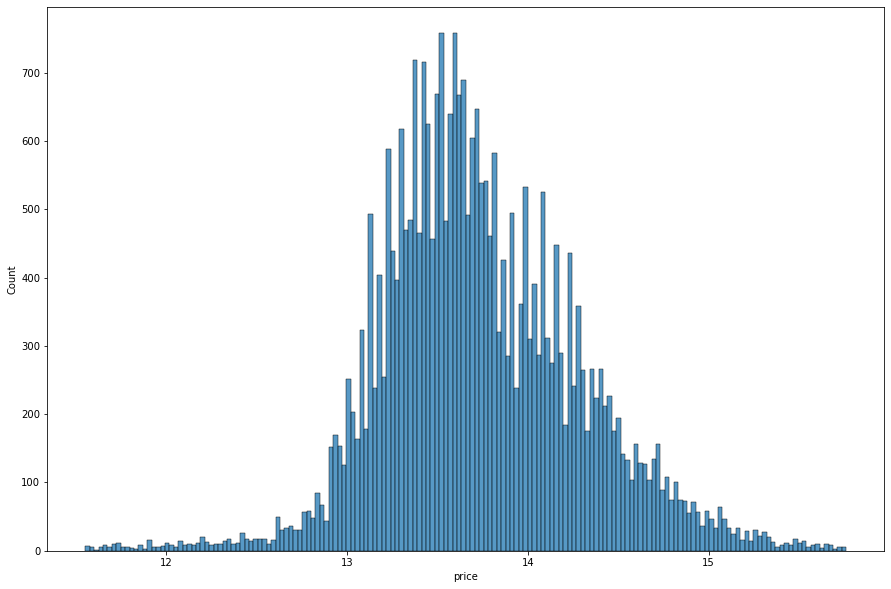

In [31]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(y_log, bins = int(np.sqrt(len(df_numeric['price']))));

It looks much more normal now. What does the coef mean?

In [32]:
(np.exp(log_model.params["sqft_living"]) - 1) * 100

0.036659010941098025

For each increase of 1 sq ft, we see an associated change of .035% in price

# I'm going to leave the logged where it is for now and look at categorical data

In [33]:
df_all_cat.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0


Let's look at reducing some of these based on the column descriptions:
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view
- 

In [34]:
df_all_cat_reduced = df_all_cat.drop(['waterfront', 'greenbelt', 'view'], axis=1).copy()

In [35]:
df_all_cat_reduced

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors
0,NO,Good,7 Average,Gas,PUBLIC,4,1.0,1.0
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0
2,NO,Average,7 Average,Gas,PUBLIC,6,2.0,1.0
3,NO,Average,9 Better,Gas,PUBLIC,3,3.0,2.0
4,YES,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0
...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2.0,1.5
30151,NO,Average,7 Average,Gas,PUBLIC,3,2.0,2.0
30152,YES,Average,7 Average,Gas,PUBLIC,3,2.0,1.0
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0


What can be changed about each of the remaining?
- nuisance: improve sound damping in house (thicker insulation/windows) or install shrubs/large fence to mute noise
- condition (overall condition related to maintenance): paint house, do some landscaping
- heat_source: upgrade/change your heat source

## Creating a function to test all of the categories

In [36]:
def check_for_category(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [37]:
def check_for_category_log(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    for i, category in enumerate(temp_list):
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = np.log(df_numeric['price'])
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [38]:
# df_all_cat_reduced.condition.value_counts()

## Lets start with the condition of the house

### Here's what the kings county website says:
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [39]:
df_all_cat_reduced['price'] = df_dropped['price']

(             count          mean            std       min       25%       50%  \
 condition                                                                       
 Average    18385.0  1.104130e+06  751012.883837  104186.0  658000.0  860000.0   
 Fair         224.0  7.955592e+05  505105.974750  135000.0  471000.0  668500.0   
 Good        8017.0  1.040761e+06  660864.215882  104920.0  615000.0  855000.0   
 Poor          59.0  7.025151e+05  745984.429476  125000.0  400000.0  580000.0   
 Very Good   3242.0  1.111885e+06  682508.479528  108758.0  650000.0  900500.0   
 
                  75%        max  
 condition                        
 Average    1300000.0  6995000.0  
 Fair        923125.0  2900000.0  
 Good       1285000.0  6800000.0  
 Poor        795000.0  5825000.0  
 Very Good  1400000.0  6975000.0  ,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squar

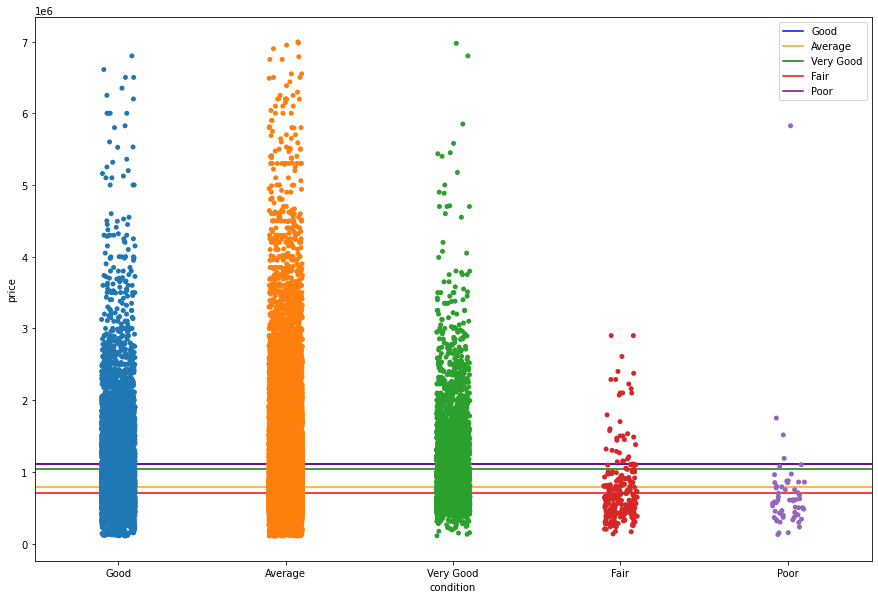

In [40]:
check_for_category('condition')

### Ok, not a lot of good info here just yet. Lets try looking at nuisance?

(            count          mean            std       min       25%       50%  \
 nuisance                                                                       
 NO        24736.0  1.083473e+06  708996.290375  104186.0  650000.0  862000.0   
 YES        5191.0  1.091659e+06  771224.184910  106088.0  650000.0  850000.0   
 
                 75%        max  
 nuisance                        
 NO        1300000.0  6995000.0  
 YES       1275000.0  6800000.0  ,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.432
 Model:                            OLS   Adj. R-squared:                  0.432
 Method:                 Least Squares   F-statistic:                 1.139e+04
 Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
 Time:                        22:05:08   Log-Likelihood:            -4.3763e+05
 No. Ob

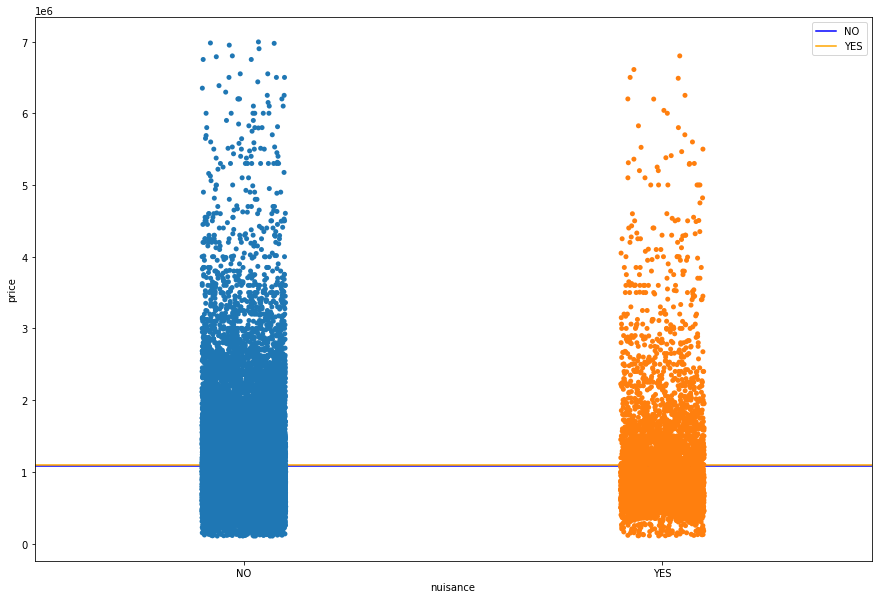

In [41]:
check_for_category('nuisance')

OK, model is not much better and this is telling us that the price goes up based on having a nuisance so that doesnt look right

## Heatsource?

(                     count          mean            std       min        25%  \
 heat_source                                                                    
 Electricity         6419.0  8.891168e+05  565183.630323  104186.0  589900.00   
 Electricity/Solar     59.0  9.381008e+05  627059.661577  104920.0  526000.00   
 Gas                20459.0  1.169025e+06  769020.328541  104725.0  675000.00   
 Gas/Solar             90.0  1.585248e+06  909409.573458  290043.0  968104.25   
 Oil                 2877.0  9.101851e+05  515491.372212  104946.0  605000.00   
 Oil/Solar              4.0  9.321750e+05  398861.616562  615000.0  678750.00   
 Other                 19.0  1.205713e+06  672109.909835  555000.0  775000.00   
 
                          50%         75%        max  
 heat_source                                          
 Electricity         750000.0   995700.00  6975000.0  
 Electricity/Solar   765000.0  1197500.00  3100000.0  
 Gas                 925000.0  1425000.00  699500

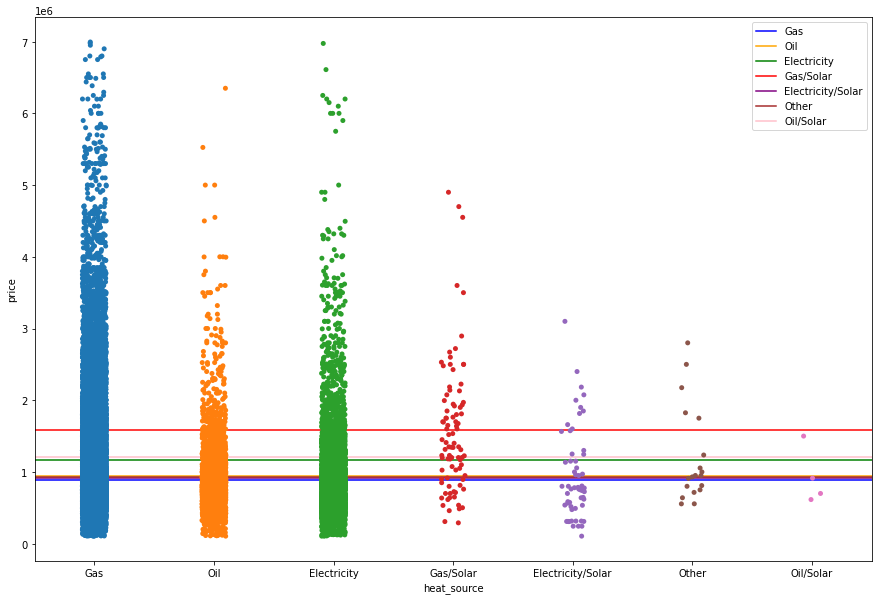

In [42]:
check_for_category('heat_source')

### How about bedrooms?

(            count          mean           std        min        25%  \
 bedrooms                                                              
 0            38.0  9.352789e+05  5.762020e+05   330000.0   591250.0   
 1           377.0  8.163302e+05  7.624051e+05   114491.0   480000.0   
 2          3897.0  7.683254e+05  4.133541e+05   104946.0   550000.0   
 3         12690.0  9.237611e+05  5.239845e+05   104186.0   600000.0   
 4          9545.0  1.253018e+06  7.591983e+05   104725.0   740000.0   
 5          2758.0  1.597196e+06  1.030503e+06   106088.0   859962.5   
 6           488.0  1.691782e+06  1.133136e+06   175000.0   879000.0   
 7            78.0  1.736958e+06  1.148083e+06   116523.0  1085000.0   
 8            37.0  1.370617e+06  6.245883e+05   450000.0  1000000.0   
 9            14.0  1.474579e+06  4.378702e+05   850000.0  1218250.0   
 10            3.0  1.700000e+06  4.589390e+05  1375000.0  1437500.0   
 11            1.0  1.200000e+06           NaN  1200000.0  12000

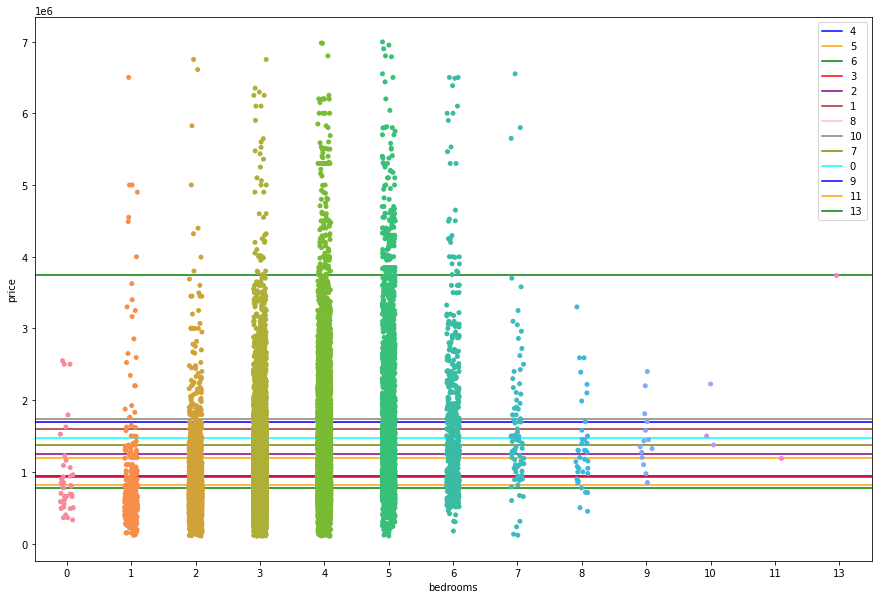

In [43]:
check_for_category('bedrooms')

Below is me running bedrooms as a numeric instead of a categorical

In [44]:
y = df_numeric['price']
X_test = df_all_cat_reduced[['bedrooms']].copy()
X_test['sqft_living'] = df_numeric['sqft_living'].copy()

test_results = sm.OLS(endog = y, exog = sm.add_constant(X_test)).fit()
    
# get a summary of the model
test_summary = test_results.summary()

In [45]:
test_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:06:23   Log-Likelihood:            -4.3737e+05
No. Observations:               29927   AIC:                         8.747e+05
Df Residuals:                   29924   BIC:                         8.748e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.502e+05   1.13e+04     22.142      0.000    2.28e+05    2.72e+05
bedrooms    -1.044e+05   4146.934    -25.174      0.000   -1.13e+05   -9.63e+04
sqft_living   565.7608      4.264    132.693      0.000     557.404     574.118
==============================================================================
Omnibus:                    14698.037   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194650.348
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                      14.812   Cond. No.                     8.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lets look at how the numerical data is going

checking for multicolinearity

In [46]:
df_numeric.corr()['price']

price            1.000000
sqft_living      0.655892
sqft_lot         0.096905
sqft_above       0.583745
sqft_basement    0.238018
sqft_garage      0.296795
sqft_patio       0.309581
yr_built         0.106209
Name: price, dtype: float64

In [47]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

new_df=df_numeric.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
new_df['pairs'] = list(zip(new_df.level_0, new_df.level_1))

# set index to pairs
new_df.set_index(['pairs'], inplace = True)

#drop level columns
new_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
new_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
new_df.drop_duplicates(inplace=True)


In [48]:
new_df[(new_df.cc>.75) & (new_df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.881432


will drop sqft_above since sq ft living has the highest correlation to price

In [49]:
df_numeric.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,1180,7140,1180,0,0,40,1969
1,920000.0,2770,6703,1570,1570,0,240,1950
2,311000.0,2880,6156,1580,1580,0,0,1956
3,775000.0,2160,1400,1090,1070,200,270,2010
4,592500.0,1120,758,1120,550,550,30,2012


In [50]:
y= df_numeric['price']
X_multi = df_numeric.drop(['price', 'sqft_above'], axis=1)

X_standardized = X_multi.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) / X_standardized[col].std()
    
# X_standardized.describe()


results_multi = sm.OLS(endog = y, exog = sm.add_constant(X_standardized)).fit()

results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     3961.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:06:39   Log-Likelihood:            -4.3735e+05
No. Observations:               29927   AIC:                         8.747e+05
Df Residuals:                   29920   BIC:                         8.748e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.085e+06   3108.107    349.053      0.000    1.08e+06    1.09e+06
sqft_living    4.822e+05   4124.666    116.913      0.000    4.74e+05     4.9e+05
sqft_lot       4422.7780   3166.379      1.397      0.162   -1783.462    1.06e+04
sqft_basement -9446.4723   3561.650     -2.652      0.008   -1.64e+04   -2465.485
sqft_garage   -1.163e+04   3887.837     -2.990      0.003   -1.92e+04   -4006.006
sqft_patio     4.898e+04   3421.125     14.318      0.000    4.23e+04    5.57e+04
yr_built      -6.943e+04   3709.823    -18.716      0.000   -7.67e+04   -6.22e+04
==============================================================================
Omnibus:                    14843.048   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202639.385
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      15.069   Cond. No.                         2.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
def check_for_category_multi(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = X_standardized.copy()
    X_cat[category_column] = df_all_cat_reduced[[category_column]].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

(            count          mean           std        min        25%  \
 bedrooms                                                              
 0            38.0  9.352789e+05  5.762020e+05   330000.0   591250.0   
 1           377.0  8.163302e+05  7.624051e+05   114491.0   480000.0   
 2          3897.0  7.683254e+05  4.133541e+05   104946.0   550000.0   
 3         12690.0  9.237611e+05  5.239845e+05   104186.0   600000.0   
 4          9545.0  1.253018e+06  7.591983e+05   104725.0   740000.0   
 5          2758.0  1.597196e+06  1.030503e+06   106088.0   859962.5   
 6           488.0  1.691782e+06  1.133136e+06   175000.0   879000.0   
 7            78.0  1.736958e+06  1.148083e+06   116523.0  1085000.0   
 8            37.0  1.370617e+06  6.245883e+05   450000.0  1000000.0   
 9            14.0  1.474579e+06  4.378702e+05   850000.0  1218250.0   
 10            3.0  1.700000e+06  4.589390e+05  1375000.0  1437500.0   
 11            1.0  1.200000e+06           NaN  1200000.0  12000

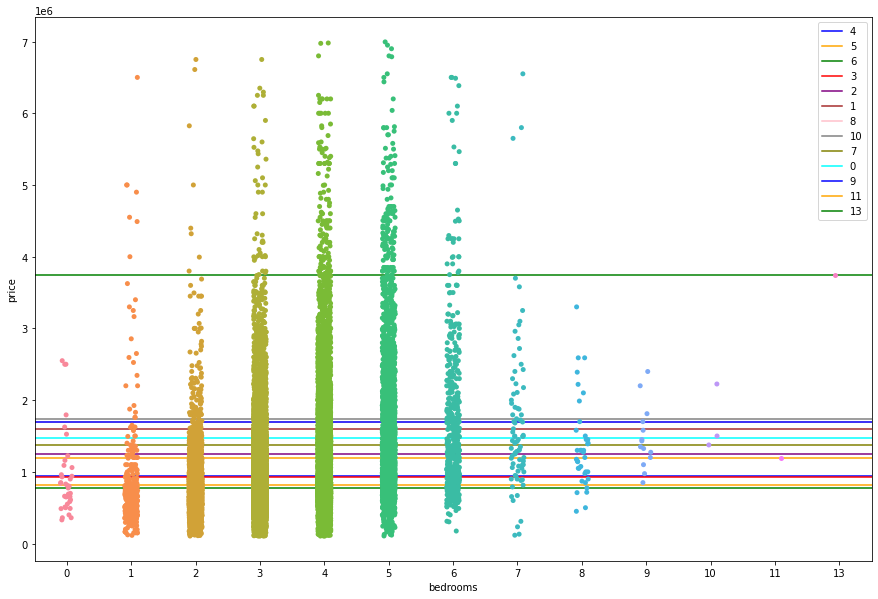

In [52]:
check_for_category_multi('bedrooms')

In [118]:
df_all_cat_reduced['bathrooms'].value_counts()

2.5     8435
2.0     7312
1.0     4526
3.0     4105
3.5     2248
1.5     1800
4.0      643
4.5      517
5.0      137
5.5       97
6.0       37
0.0       24
6.5       19
7.5        9
7.0        8
0.5        5
9.5        2
8.0        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64

In [119]:
df_all_cat_reduced.columns

Index(['nuisance', 'condition', 'grade', 'heat_source', 'sewer_system',
       'bedrooms', 'bathrooms', 'floors', 'price'],
      dtype='object')

In [120]:
remove_smalls = df_all_cat_reduced.copy()

for col in remove_smalls.columns:
    remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10]
# 1. Shows the cats that don’t make the cutoff of 10 
    to_replace = remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10].index.values
# 2. Creates an array of just the col items with counts below 10
    remove_smalls.replace(to_replace, value="other", inplace=True)
# 3. replaces the name for everything in to_replace with 'other'

In [121]:
remove_smalls['bathrooms'].value_counts()

2.5      8435
2.0      7312
1.0      4526
3.0      4105
3.5      2248
1.5      1800
4.0       643
4.5       517
5.0       137
5.5        97
6.0        37
other      27
0.0        24
6.5        19
Name: bathrooms, dtype: int64

In [105]:
remove_smalls = df_all_cat_reduced.copy()
remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10]
to_replace = remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10].index.values
remove_smalls.replace(to_replace, value="other", inplace=True)

In [106]:
remove_smalls['bedrooms'].value_counts()

3        12690
4         9545
2         3897
5         2758
6          488
1          377
7           78
0           38
8           37
9           14
other        5
Name: bedrooms, dtype: int64

# Resetting all categorical stuff and trying it again with my 
# reduced_smalls function

In [78]:
df_all_cat_reduced

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,4,1.0,1.0,675000.0
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000.0
2,NO,Average,7 Average,Gas,PUBLIC,6,2.0,1.0,311000.0
3,NO,Average,9 Better,Gas,PUBLIC,3,3.0,2.0,775000.0
4,YES,Average,7 Average,Electricity,PUBLIC,2,2.0,2.0,592500.0
...,...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2.0,1.5,1555000.0
30151,NO,Average,7 Average,Gas,PUBLIC,3,2.0,2.0,1313000.0
30152,YES,Average,7 Average,Gas,PUBLIC,3,2.0,1.0,800000.0
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000.0


In [99]:
# remove_smalls = df_all_cat_reduced.drop(['price'], axis=1).copy()


# this is still buggy and changes more than it should for some reason

remove_smalls = df_all_cat_reduced.copy()



for col in remove_smalls.columns:
    remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10]
# 1. Shows the cats that don’t make the cutoff of 10 
    to_replace = remove_smalls[col].value_counts()[remove_smalls[col].value_counts() < 10].index.values
# 2. Creates an array of just the col items with counts below 10
    remove_smalls = remove_smalls.replace(to_replace, value="other")
# 3. replaces the name for everything in to_replace with 'other'

In [93]:
remove_smalls = df_all_cat_reduced.copy()
remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10]
to_replace = remove_smalls['bedrooms'].value_counts()[remove_smalls['bedrooms'].value_counts() < 10].index.values
to_replace = remove_smalls['bathrooms'].value_counts()[remove_smalls['bathrooms'].value_counts() < 10].index.values
remove_smalls.replace(to_replace, value="other", inplace=True)


In [100]:
to_replace

array([ 678000., 1440000., 2325000., ..., 1807500.,  936512.,  720902.])

In [101]:
remove_smalls

,nuisance,condition,grade,heat_source,sewer_system,bedrooms,bathrooms,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,4,1,1.0,675000
1,YES,Average,7 Average,Oil,PUBLIC,5,2.5,1.0,920000
2,NO,Average,7 Average,Gas,PUBLIC,6,2,1.0,other
3,NO,Average,9 Better,Gas,PUBLIC,3,3,2.0,775000
4,YES,Average,7 Average,Electricity,PUBLIC,2,2,2.0,other
...,...,...,...,...,...,...,...,...,...
30150,NO,Good,8 Good,Oil,PUBLIC,5,2,1.5,1.555e+06
30151,NO,Average,7 Average,Gas,PUBLIC,3,2,2.0,other
30152,YES,Average,7 Average,Gas,PUBLIC,3,2,1.0,800000
30153,NO,Average,8 Good,Gas,PUBLIC,3,2.5,2.0,775000


In [102]:
remove_smalls['bedrooms'].value_counts()

3        12690
4         9545
2         3897
5         2758
6          488
1          377
other      120
0           38
9           14
Name: bedrooms, dtype: int64